In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df = df.drop(columns='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1').copy()
df = df.drop(columns='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2').copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# EDA & Visualization

In [6]:
comp = df.groupby("Attrition_Flag")["CLIENTNUM"].count()
comp

Attrition_Flag
Attrited Customer    1627
Existing Customer    8500
Name: CLIENTNUM, dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

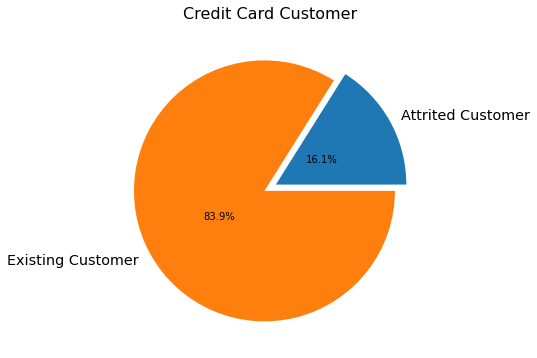

In [7]:
pie, ax = plt.subplots(figsize=[10,6])
labels = comp.keys()
plt.pie(x=comp, autopct="%1.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.4)
plt.title('Credit Card Customer', fontsize = 16)
plt.tight_layout

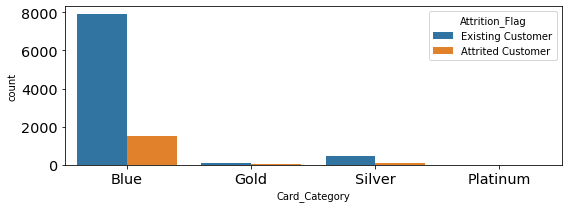

In [8]:
plt.figure(figsize=(8,3))
sns.countplot(x='Card_Category', data=df, hue='Attrition_Flag')
plt.tight_layout()

In [9]:
df.groupby("Card_Category")["Attrition_Flag"].count()

Card_Category
Blue        9436
Gold         116
Platinum      20
Silver       555
Name: Attrition_Flag, dtype: int64

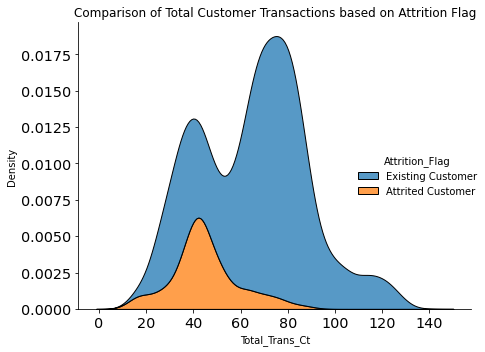

In [10]:
sns.displot(data=df, x="Total_Trans_Ct", hue="Attrition_Flag", multiple="stack", kind="kde").set(title='Comparison of Total Customer Transactions based on Attrition Flag')
plt.tight_layout()

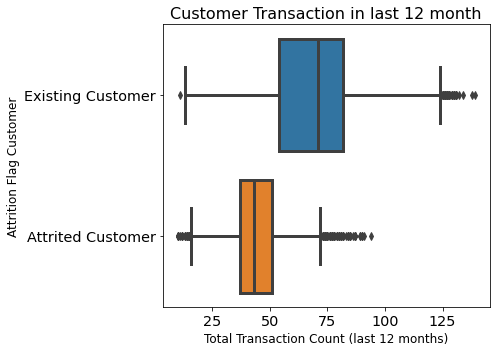

In [11]:
plt.figure(figsize=(7,5))
plt.title('Customer Transaction in last 12 month', fontsize = 16, loc="center")
sns.boxplot(x='Total_Trans_Ct', y='Attrition_Flag', data=df);

plt.xlabel('Total Transaction Count (last 12 months)', fontsize = 12)
plt.ylabel('Attrition Flag Customer', fontsize = 12);
plt.tight_layout()

### One way to interpret the separating measures from the boxplot chart above is : 

- 50% of customers who left credit card services had a number of transactions in the last 12 months less than or equal to 43, remembering that the maximum number of transactions in the last 12 months of customers who left the service is 72. While the median of the people who remained with the card services is 71 transactions.

- 75% of customers who left credit card services had a number of transactions in the last 12 months equal to or less than 51. The third quartile of people who remained with card services is 82 transactions.

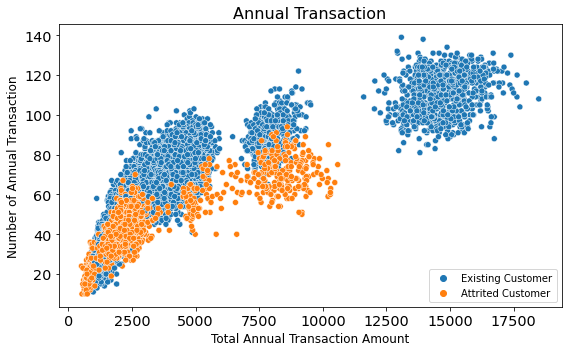

In [12]:
plt.figure(figsize=(8,5))
plt.title('Annual Transaction', fontsize = 16, loc="center")
sns.scatterplot(x = 'Total_Trans_Amt', y= 'Total_Trans_Ct', hue="Attrition_Flag", data=df, sizes=6);

plt.xlabel('Total Annual Transaction Amount', fontsize = 12)
plt.ylabel('Number of Annual Transaction', fontsize = 12);

plt.legend(loc='lower right')
plt.savefig('Annual_Trans.png',bbox_inches='tight')
plt.tight_layout()

We can conclude from total amount, the fact that there are no attractive customers who use more than 11 thousand. Churned customers also characterized by a more significant reduction in the usage of their credit card during the last 12 months.

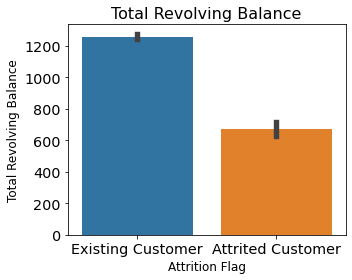

In [13]:
plt.figure(figsize=(5,4))
plt.title('Total Revolving Balance', fontsize = 16)
sns.barplot(x='Attrition_Flag', y='Total_Revolving_Bal',data=df)

plt.xlabel('Attrition Flag', fontsize = 12)
plt.ylabel('Total Revolving Balance', fontsize = 12);

plt.savefig('Revolving_Balance.png', bbox_inches='tight')
plt.tight_layout()

We notice a major difference when analizying the revolving balance of the customers' credit lines: more than half of the churned customers have paid off all their debt. It is unclear whether this measure for the revolving balance is conducted before or after the termination of the credit line and whether customers who cancel their credit cards are asked to pay off all their standing debt.

In [14]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [15]:
df['Attrition_Flag'].astype('int64')

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

NOTES :
- `Attrition_Flag` is target column
- To facilitate analysis, the target column is converted to numerical

In [16]:
num_dtypes = ['int64', 'float64']
cat_dtypes = ['object']

num_df = df.select_dtypes(include=num_dtypes)
numericals = num_df.columns

cat_df = df.select_dtypes(include=cat_dtypes)
categoricals = cat_df.columns

print(numericals)
print(categoricals)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


In [17]:
df[numericals].describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [18]:
df[categoricals].describe()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,5358,3128,4687,3561,9436


In [19]:
for col in categoricals:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Gender:
F    5358
M    4769
Name: Gender, dtype: int64

Value count kolom Education_Level:
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Value count kolom Marital_Status:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Value count kolom Income_Category:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

Value count kolom Card_Category:
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64



## Correlation Heatmap

<AxesSubplot:>

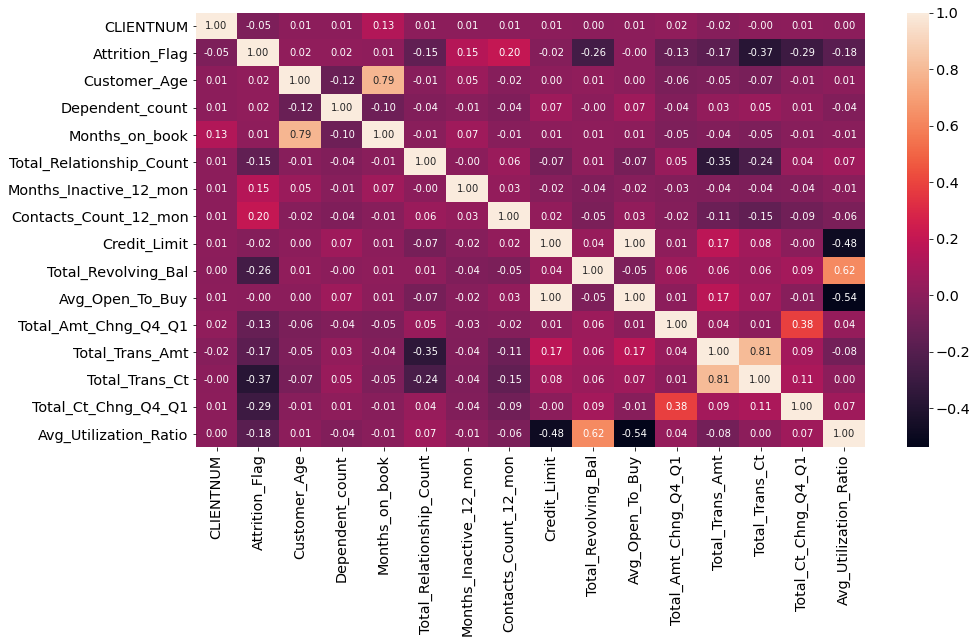

In [20]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

NOTES :
- `Attrition Flag` memiliki korelasi positif kuat dengan `Contact Count 12 Month`
- dan memiliki korelasi positif lemah dengan `Months Inactive 12 Month`
- `Average Open to Buy` memiliki korelasi positif sangat kuat dengan `Credit Limit`, kemungkinan feature ini redundan
- `Months on Book` dengan `Customer Age` memiliki korelasi positif kuat, ada kemungkinan feature ini juga redundan.

## Univariate Analysis

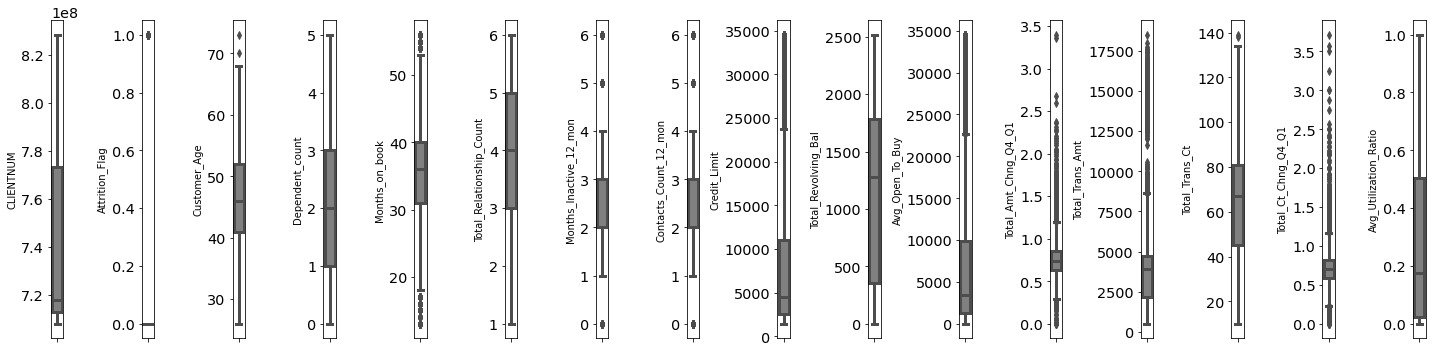

In [21]:
plt.figure(figsize=(20,5))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='gray', orient='v')
    plt.tight_layout()

 Outlier terlihat pada kolom `Credit Limit`, `Avg_open_To_buy`, `Total_Amt_Chnge_Q4_Q1`

C:\Users\SAKUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SAKUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SAKUM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

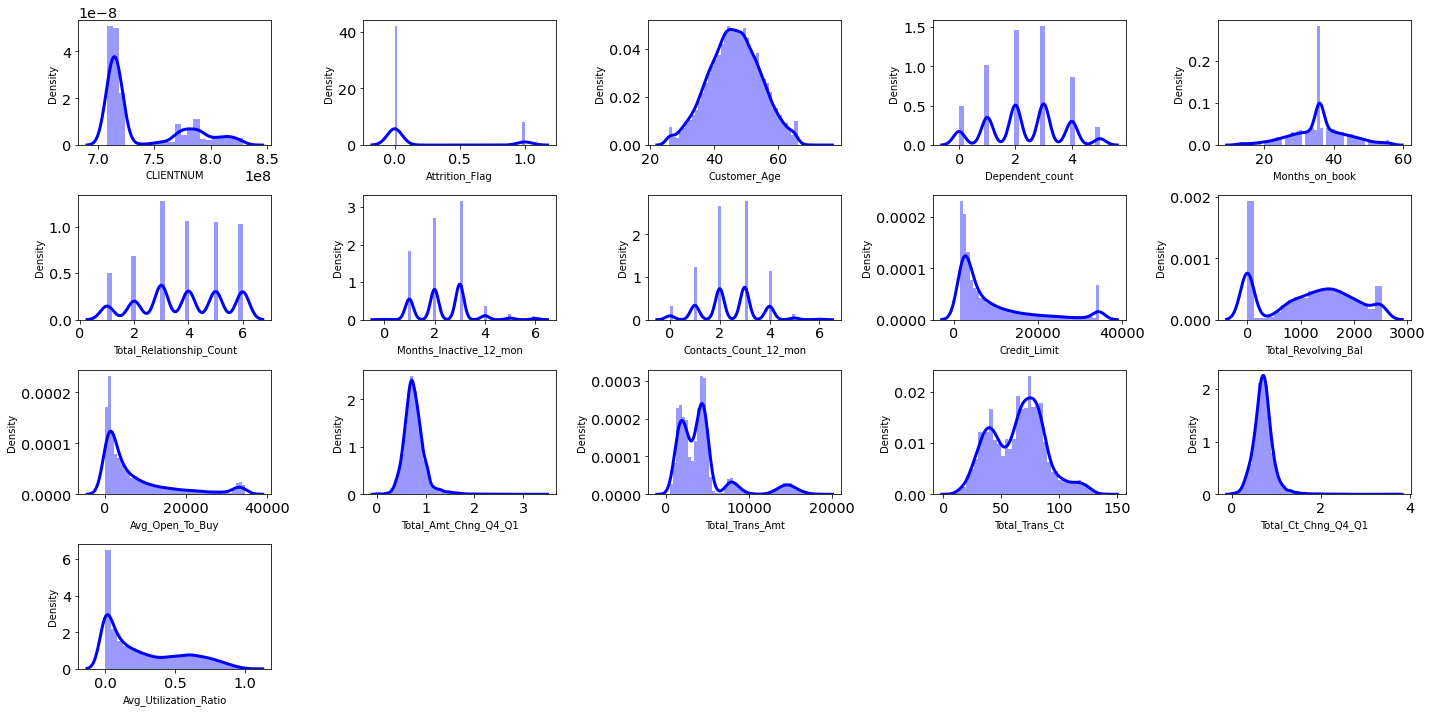

In [22]:
plt.figure(figsize=(20,10))
for i in range(0, len(numericals)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[numericals[i]], color='blue')
    plt.tight_layout()

terlihat `Credit Limit`, `Avg_Open_to_Buy` memiliki negatively skewed.

C:\Users\SAKUM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SAKUM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SAKUM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SAKUM\anaconda3\lib\si

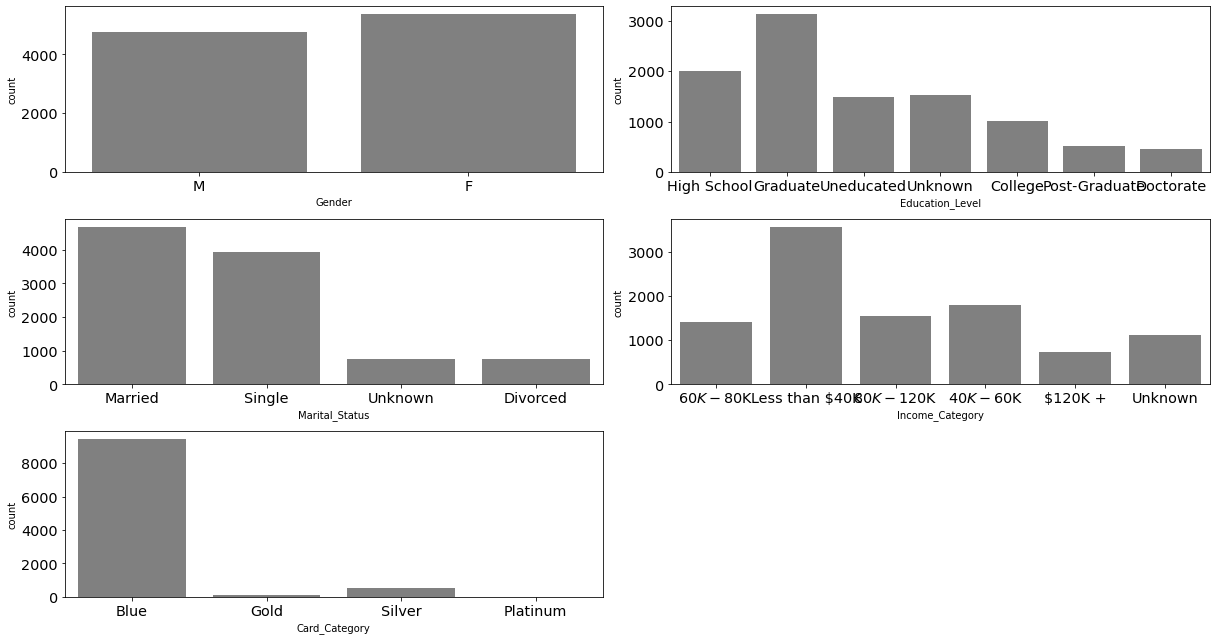

In [23]:
plt.figure(figsize=(17,9))
for i in range(0, len(categoricals)):
    plt.subplot(3,2, i+1)
    sns.countplot(df[categoricals[i]], color='gray', orient='v')
    plt.tight_layout()

NOTES : 
- `Marital Status` didominasi oleh Married dan Single
- `Card Category` didominasi oleh 1 kategori yaitu Blue

# Data Pre-Processing

In [24]:
df = df.drop(columns='CLIENTNUM').copy()

In [25]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [27]:
num_dtypes = ['int64', 'float64']
cat_dtypes = ['object']

num_df = df.select_dtypes(include=num_dtypes)
numericals = num_df.columns

cat_df = df.select_dtypes(include=cat_dtypes)
categoricals = cat_df.columns

print(numericals)
print(categoricals)

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


In [28]:
for i in categoricals:
    print(i)

Gender
Education_Level
Marital_Status
Income_Category
Card_Category


In [29]:
for i in numericals:
    print(i)

Attrition_Flag
Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio


## Outliers

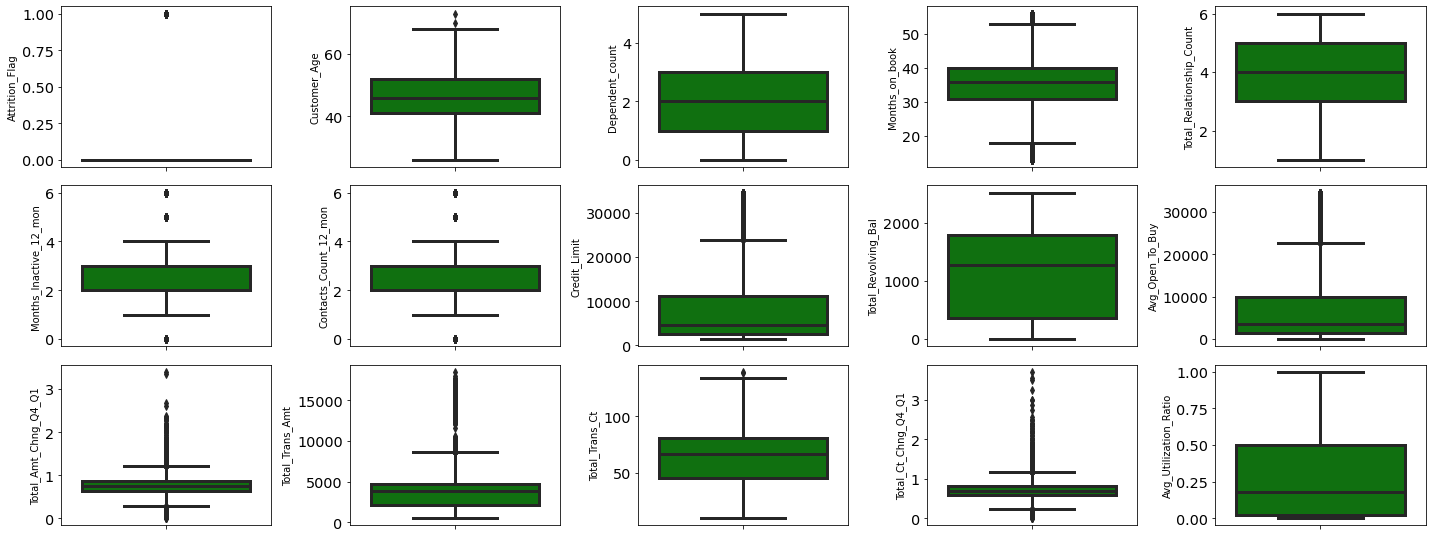

In [30]:
plt.figure(figsize=(20,10))
for i in range(0, len(numericals)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=df[numericals[i]], color='green', orient='v')
    plt.tight_layout()

In [31]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Ct_Chng_Q4_Q1']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')
# 1 kali running

Jumlah baris sebelum memfilter outlier: 10127
Jumlah baris setelah memfilter outlier: 7813


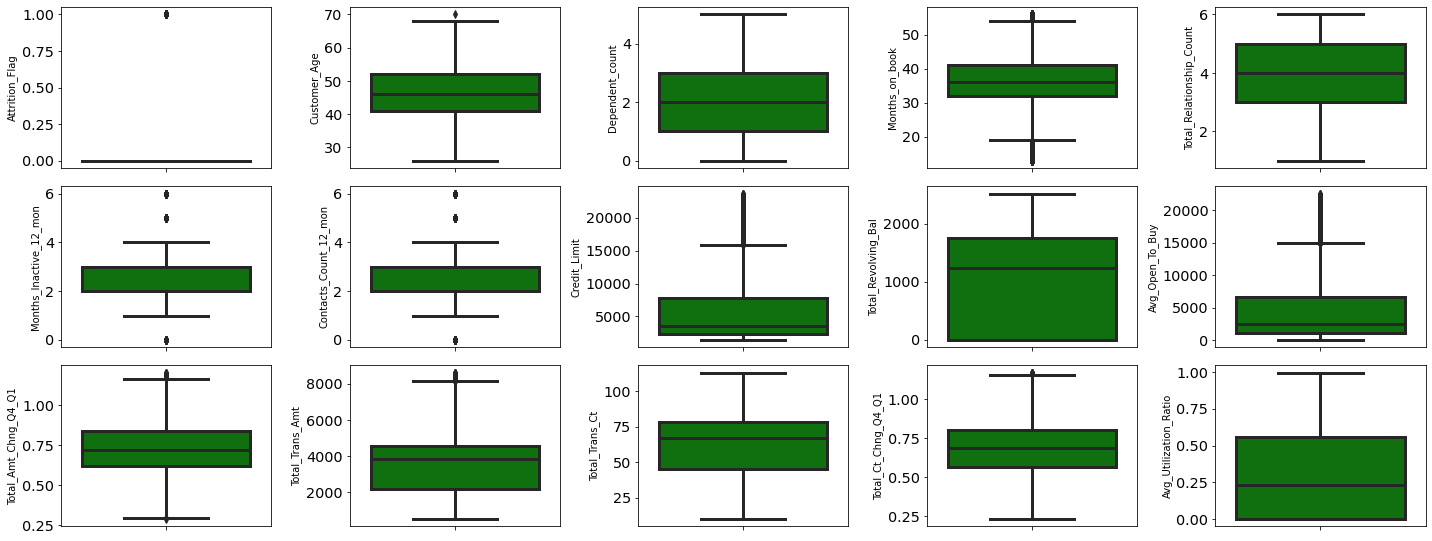

In [32]:
plt.figure(figsize=(20,10))
for i in range(0, len(numericals)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=df[numericals[i]], color='green', orient='v')
    plt.tight_layout()

## Normalization/Standardization

In [33]:
df.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000
mean,0.166389,46.467682,2.336618,36.036734,3.955971,2.360809,2.457315,5833.152937,1133.559708,4699.593229,0.730983,3567.696275,62.447715,0.685684,0.306884
std,0.372454,8.029030,1.298050,8.016164,1.502381,1.020519,1.111144,5045.315404,816.904246,5066.839440,0.164576,1609.267461,19.545154,0.179776,0.283228
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,10.000000,0.289000,510.000000,10.000000,0.231000,0.000000
25%,0.000000,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2329.000000,0.000000,1073.000000,0.620000,2170.000000,45.000000,0.568000,0.000000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,3566.000000,1245.000000,2512.000000,0.722000,3837.000000,67.000000,0.686000,0.231000
75%,0.000000,52.000000,3.000000,41.000000,5.000000,3.000000,3.000000,7762.000000,1758.000000,6605.000000,0.838000,4560.000000,78.000000,0.804000,0.555000
max,1.000000,70.000000,5.000000,56.000000,6.000000,6.000000,6.000000,23692.000000,2517.000000,22599.000000,1.201000,8618.000000,113.000000,1.171000,0.995000


In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [35]:
df['Customer_Age_std'] = StandardScaler().fit_transform(df['Customer_Age'].values.reshape(len(df), 1))
df['Dependent_count_std'] = StandardScaler().fit_transform(df['Dependent_count'].values.reshape(len(df), 1))
df['Months_on_book_std'] = StandardScaler().fit_transform(df['Months_on_book'].values.reshape(len(df), 1))
df['Total_Relationship_Count_std'] = StandardScaler().fit_transform(df['Total_Relationship_Count'].values.reshape(len(df), 1))
df['Months_Inactive_12_mon_std'] = StandardScaler().fit_transform(df['Months_Inactive_12_mon'].values.reshape(len(df), 1))
df['Contacts_Count_12_mon_std'] = StandardScaler().fit_transform(df['Contacts_Count_12_mon'].values.reshape(len(df), 1))
df['Credit_Limit_norm'] = MinMaxScaler().fit_transform(df['Credit_Limit'].values.reshape(len(df), 1))
df['Total_Revolving_Bal_std'] = StandardScaler().fit_transform(df['Total_Revolving_Bal'].values.reshape(len(df), 1))
df['Avg_Open_To_Buy_norm'] = MinMaxScaler().fit_transform(df['Avg_Open_To_Buy'].values.reshape(len(df), 1))
df['Total_Amt_Chng_Q4_Q1_std'] = StandardScaler().fit_transform(df['Total_Amt_Chng_Q4_Q1'].values.reshape(len(df), 1))
df['Total_Trans_Amt_std'] = StandardScaler().fit_transform(df['Total_Trans_Amt'].values.reshape(len(df), 1))
df['Total_Trans_Ct_std'] = StandardScaler().fit_transform(df['Total_Trans_Ct'].values.reshape(len(df), 1))
df['Total_Ct_Chng_Q4_Q1_std'] = StandardScaler().fit_transform(df['Total_Ct_Chng_Q4_Q1'].values.reshape(len(df), 1))
df['Avg_Utilization_Ratio_norm'] = MinMaxScaler().fit_transform(df['Avg_Utilization_Ratio'].values.reshape(len(df), 1))

In [36]:
df.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Months_Inactive_12_mon_std,Contacts_Count_12_mon_std,Credit_Limit_norm,Total_Revolving_Bal_std,Avg_Open_To_Buy_norm,Total_Amt_Chng_Q4_Q1_std,Total_Trans_Amt_std,Total_Trans_Ct_std,Total_Ct_Chng_Q4_Q1_std,Avg_Utilization_Ratio_norm
count,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,...,7.813000e+03,7.813000e+03,7813.000000,7.813000e+03,7813.000000,7.813000e+03,7.813000e+03,7.813000e+03,7.813000e+03,7813.000000
mean,0.166389,46.467682,2.336618,36.036734,3.955971,2.360809,2.457315,5833.152937,1133.559708,4699.593229,...,1.688141e-15,2.203181e-15,0.197489,1.087288e-15,0.207605,1.986550e-16,2.311788e-15,3.911782e-15,-8.048406e-16,0.308426
std,0.372454,8.029030,1.298050,8.016164,1.502381,1.020519,1.111144,5045.315404,816.904246,5066.839440,...,1.000064e+00,1.000064e+00,0.226718,1.000064e+00,0.224306,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,0.284651
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,10.000000,...,-2.313489e+00,-2.211659e+00,0.000000,-1.387717e+00,0.000000,-2.685757e+00,-1.900176e+00,-2.683584e+00,-2.529336e+00,0.000000
25%,0.000000,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2329.000000,0.000000,1073.000000,...,-3.535769e-01,-4.115974e-01,0.040025,-1.387717e+00,0.047058,-6.743981e-01,-8.685851e-01,-8.927447e-01,-6.546566e-01,0.000000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,3566.000000,1245.000000,2512.000000,...,-3.535769e-01,-4.115974e-01,0.095611,1.364265e-01,0.110762,-5.458373e-02,1.673562e-01,2.329261e-01,1.759349e-03,0.232161
75%,0.000000,52.000000,3.000000,41.000000,5.000000,3.000000,3.000000,7762.000000,1758.000000,6605.000000,...,6.263793e-01,4.884336e-01,0.284164,7.644473e-01,0.291956,6.503032e-01,6.166577e-01,7.957614e-01,6.581753e-01,0.557789
max,1.000000,70.000000,5.000000,56.000000,6.000000,6.000000,6.000000,23692.000000,2517.000000,22599.000000,...,3.566248e+00,3.188527e+00,1.000000,1.693624e+00,1.000000,2.856113e+00,3.138463e+00,2.586601e+00,2.699740e+00,1.000000


## Feature Encoding

In [37]:
for i in numericals:
    print(i)

Attrition_Flag
Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio


In [38]:
for i in categoricals:
    print(i)

Gender
Education_Level
Marital_Status
Income_Category
Card_Category


### One Hot Encoding

In [39]:
for i in categoricals[1:5]:
    onehots = pd.get_dummies(df[i],prefix=i)
    df = df.join(onehots)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 10 to 10125
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  7813 non-null   int64  
 1   Customer_Age                    7813 non-null   int64  
 2   Gender                          7813 non-null   object 
 3   Dependent_count                 7813 non-null   int64  
 4   Education_Level                 7813 non-null   object 
 5   Marital_Status                  7813 non-null   object 
 6   Income_Category                 7813 non-null   object 
 7   Card_Category                   7813 non-null   object 
 8   Months_on_book                  7813 non-null   int64  
 9   Total_Relationship_Count        7813 non-null   int64  
 10  Months_Inactive_12_mon          7813 non-null   int64  
 11  Contacts_Count_12_mon           7813 non-null   int64  
 12  Credit_Limit                    

In [41]:
dfa = df.drop(columns=categoricals[:5]).copy()

In [42]:
dfb = dfa.drop(columns=numericals[1:15]).copy()

In [43]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 10 to 10125
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  7813 non-null   int64  
 1   Customer_Age_std                7813 non-null   float64
 2   Dependent_count_std             7813 non-null   float64
 3   Months_on_book_std              7813 non-null   float64
 4   Total_Relationship_Count_std    7813 non-null   float64
 5   Months_Inactive_12_mon_std      7813 non-null   float64
 6   Contacts_Count_12_mon_std       7813 non-null   float64
 7   Credit_Limit_norm               7813 non-null   float64
 8   Total_Revolving_Bal_std         7813 non-null   float64
 9   Avg_Open_To_Buy_norm            7813 non-null   float64
 10  Total_Amt_Chng_Q4_Q1_std        7813 non-null   float64
 11  Total_Trans_Amt_std             7813 non-null   float64
 12  Total_Trans_Ct_std              

## Imbalanced Dataset

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1_std', ylabel='Customer_Age_std'>

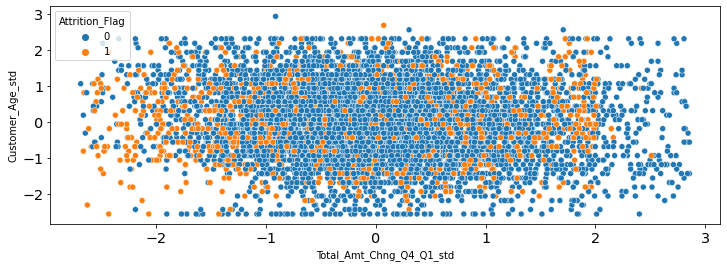

In [44]:
df_example = dfb[['Total_Amt_Chng_Q4_Q1_std', 'Customer_Age_std', 'Attrition_Flag']]
sns.scatterplot(data = dfb, x ='Total_Amt_Chng_Q4_Q1_std', y = 'Customer_Age_std', hue = 'Attrition_Flag')

# Modelling and Evaluation

In [45]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option("max_column",100)
pd.set_option("max_colwidth",1000)
pd.set_option("max_row",1000)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

## Classification

Split and Train Data

In [47]:
# Split Feature dan Label
X = dfb.drop(columns=['Attrition_Flag'])
y = dfb['Attrition_Flag'] # target / label

#Split data menjadi Train and Test
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [48]:
#Create an oversampled training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

---
# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [50]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1952
           1       0.75      0.61      0.68       392

    accuracy                           0.90      2344
   macro avg       0.84      0.79      0.81      2344
weighted avg       0.90      0.90      0.90      2344



In [51]:
#Training with oversampled data
classifier_o = LogisticRegression(random_state=42)
classifier_o.fit(X_oversample, y_oversample)
print(classification_report(y_test, classifier_o.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1952
           1       0.64      0.71      0.67       392

    accuracy                           0.89      2344
   macro avg       0.79      0.82      0.80      2344
weighted avg       0.89      0.89      0.89      2344



### Hyperparameter Tuning

In [52]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002]
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42)
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
model.fit(X_oversample, y_oversample)
y_pred = model.predict(X_test)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1952
           1       0.49      0.83      0.62       392

    accuracy                           0.83      2344
   macro avg       0.72      0.83      0.75      2344
weighted avg       0.88      0.83      0.84      2344



In [53]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.002


In [54]:
print('Train score: ' + str(model.score(X_oversample, y_oversample))) 
print('Test score:' + str(model.score(X_oversample, y_oversample))) 

Train score: 0.8811664108748082
Test score:0.8811664108748082


In [55]:
eval_classification(model, y_pred, X_oversample, y_oversample, X_test, y_test)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.49
Recall (Test Set): 0.83
F1-Score (Test Set): 0.62
AUC: 0.83


In [56]:
y_pred_train = model.predict(X_oversample)
y_pred_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [57]:
print("Recall (Train Set): %.2f" % recall_score(y_oversample, y_pred_train))

Recall (Train Set): 0.88


---
# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_oversample, y_oversample)

# Prediction & Evaluation
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      1952
           1       0.53      0.92      0.67       392

    accuracy                           0.85      2344
   macro avg       0.75      0.88      0.79      2344
weighted avg       0.90      0.85      0.86      2344



In [59]:
print('Train score: ' + str(model.score(X_oversample, y_oversample)))
print('Test score:' + str(model.score(X_oversample, y_oversample)))

Train score: 0.9522034641525982
Test score:0.9522034641525982


In [60]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [61]:
eval_classification(model, y_pred, X_oversample, y_oversample, X_test, y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.53
Recall (Test Set): 0.92
F1-Score (Test Set): 0.67
AUC: 0.88


In [62]:
y_pred_train = model.predict(X_oversample)
y_pred_train

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [63]:
print("Recall (Train Set): %.2f" % recall_score(y_oversample, y_pred_train))

Recall (Train Set): 1.00


## Hyperparameter Tuning with RandomSearch

In [64]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform','distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fit Model & Evaluasi
model.fit(X_oversample, y_oversample)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1952
           1       0.58      0.89      0.70       392

    accuracy                           0.87      2344
   macro avg       0.78      0.88      0.81      2344
weighted avg       0.91      0.87      0.88      2344



In [65]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 6
Best p: 1
Best algorithm: kd_tree


In [66]:
print('Train score: ' + str(model.score(X_oversample, y_oversample))) #accuracy
print('Test score:' + str(model.score(X_oversample, y_oversample))) #accuracy

Train score: 1.0
Test score:1.0


In [67]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [68]:
eval_classification(model, y_pred, X_oversample, y_oversample, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.58
Recall (Test Set): 0.89
F1-Score (Test Set): 0.70
AUC: 0.88


In [69]:
y_pred_train = model.predict(X_oversample)
y_pred_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [70]:
print("Recall (Train Set): %.2f" % recall_score(y_oversample, y_pred_train))

Recall (Train Set): 1.00


---
# Decision Tree

Fit & Predict

In [71]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_oversample, y_oversample)

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1952
           1       0.71      0.82      0.76       392

    accuracy                           0.91      2344
   macro avg       0.83      0.88      0.85      2344
weighted avg       0.92      0.91      0.92      2344



In [72]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [73]:
eval_classification(model, y_pred, X_oversample, y_oversample, X_test, y_test)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.71
Recall (Test Set): 0.82
F1-Score (Test Set): 0.76
AUC: 0.88


In [74]:
y_pred_train = model.predict(X_oversample)
y_pred_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [75]:
print("Recall (Train Set): %.2f" % recall_score(y_oversample, y_pred_train))

Recall (Train Set): 1.00


In [76]:
print('Train score: ' + str(model.score(X_oversample, y_oversample)))
print('Test score:' + str(model.score(X_oversample, y_oversample)))

Train score: 1.0
Test score:1.0


## Hyperparameter Tuning with RandomSearch

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [2, 5, 10, 100] 
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['auto', 'sqrt']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(X_oversample, y_oversample)

# Predict & Evaluation
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1952
           1       0.63      0.71      0.67       392

    accuracy                           0.88      2344
   macro avg       0.79      0.81      0.80      2344
weighted avg       0.89      0.88      0.89      2344



In [78]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


In [79]:
print('Train score: ' + str(model.score(X_oversample, y_oversample)))
print('Test score:' + str(model.score(X_oversample, y_oversample)))

Train score: 0.9653584740188556
Test score:0.9653584740188556


## Hyperparameter Tuning with GridSearch

In [80]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] 
min_samples_split = [2, 5, 10, 100] 
min_samples_leaf = [1, 2, 4, 10, 20, 50] 
max_features = ['auto', 'sqrt']

criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='recall')
model.fit(X_oversample, y_oversample)

# Predict & Evaluation
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1952
           1       0.65      0.82      0.72       392

    accuracy                           0.90      2344
   macro avg       0.80      0.87      0.83      2344
weighted avg       0.91      0.90      0.90      2344



In [81]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])
print('Best criterion:', model.best_estimator_.get_params()['criterion'])
print('Best splitter:', model.best_estimator_.get_params()['splitter'])

Best max_depth: 19
Best min_samples_split: 2
Best min_samples_leaf: 1
Best max_features: auto
Best criterion: gini
Best splitter: best


In [82]:
print('Train score: ' + str(model.score(X_oversample, y_oversample)))
print('Test score:' + str(model.score(X_oversample, y_oversample)))

Train score: 0.9991229993422495
Test score:0.9991229993422495


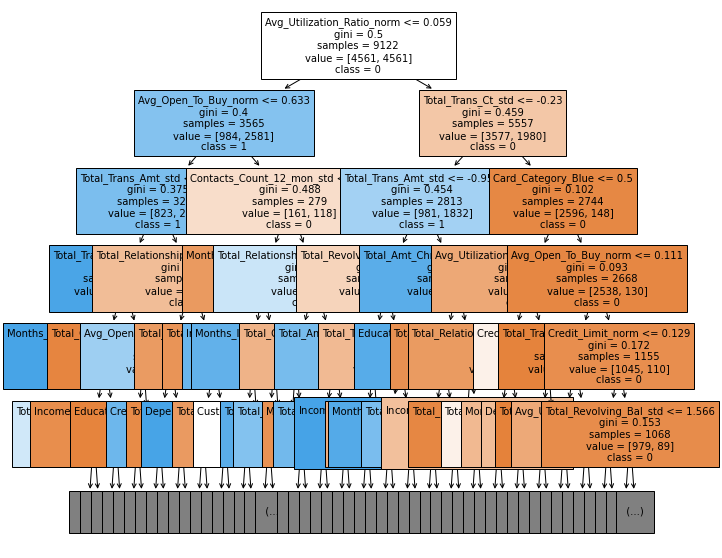

In [83]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

## Feature Importance

Text(0.5, 1.0, 'feature importance score')

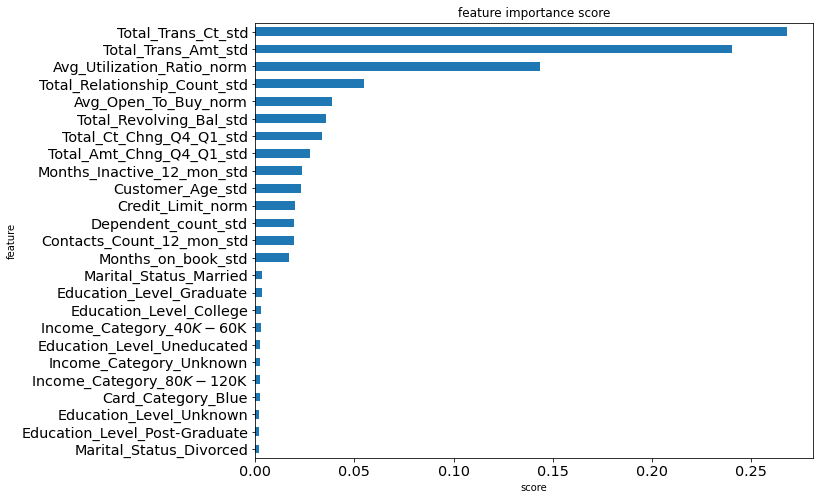

In [84]:
# plt.figsize(10, 8)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

---
# Bagging : Random Forest

In [85]:
# Split Feature dan Label
X = dfb.drop(columns=['Attrition_Flag'])
y = dfb['Attrition_Flag'] # target / label

#Split data menjadi Train and Test
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_oversample, y_oversample)

print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1952
           1       0.83      0.85      0.84       392

    accuracy                           0.95      2344
   macro avg       0.90      0.91      0.90      2344
weighted avg       0.95      0.95      0.95      2344



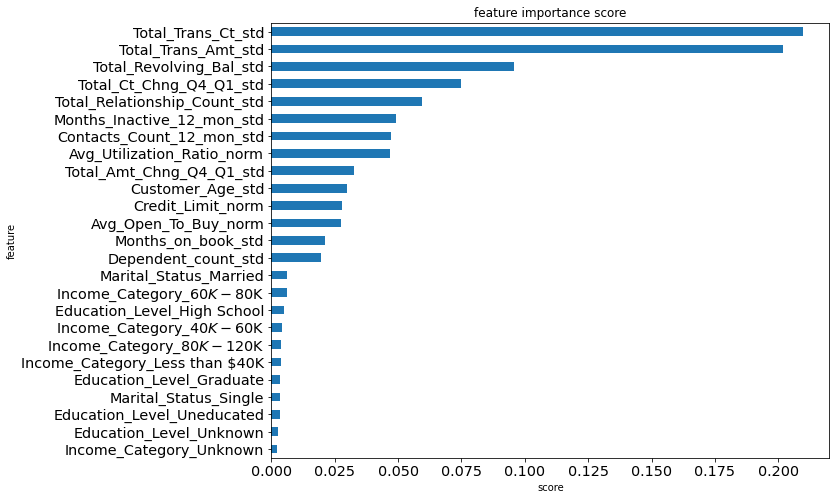

In [87]:
show_feature_importance(rf)

## Hyperparameter tuning with RandomizedSearch

In [88]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], 
                       bootstrap = [True],
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], 
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], 
                       max_features = ['auto', 'sqrt', 'log2'], 
                       n_jobs = [-1],
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_oversample, y_oversample)

# Predict & Evaluation
print(classification_report(y_test, rf_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1952
           1       0.84      0.88      0.86       392

    accuracy                           0.95      2344
   macro avg       0.91      0.92      0.92      2344
weighted avg       0.95      0.95      0.95      2344



In [89]:
y_pred = rf_tuned.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [90]:
eval_classification(rf_tuned, y_pred, X_oversample, y_oversample, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.84
Recall (Test Set): 0.88
F1-Score (Test Set): 0.86
AUC: 0.92


In [91]:
y_pred_train = rf_tuned.predict(X_oversample)
y_pred_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [92]:
print("Recall (Train Set): %.2f" % recall_score(y_oversample, y_pred_train))

Recall (Train Set): 1.00


In [93]:
print('Train score: ' + str(model.score(X_oversample, y_oversample)))
print('Test score:' + str(model.score(X_oversample, y_oversample)))

Train score: 0.9991229993422495
Test score:0.9991229993422495


In [94]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


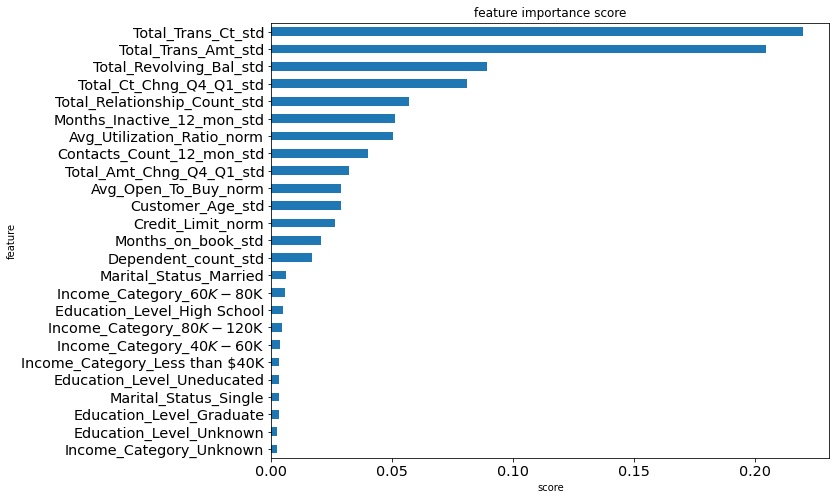

In [95]:
show_feature_importance(rf_tuned.best_estimator_)

---
# Boosting: AdaBoost

In [96]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_oversample, y_oversample)

print(classification_report(y_test, ab.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1952
           1       0.79      0.91      0.85       392

    accuracy                           0.94      2344
   macro avg       0.89      0.93      0.91      2344
weighted avg       0.95      0.94      0.95      2344



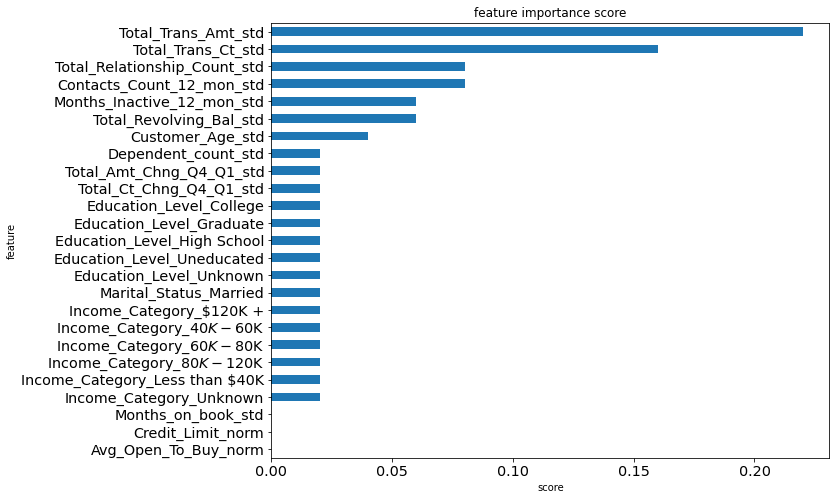

In [97]:
show_feature_importance(ab)

## Hyperparameter Tuning AdaBoost

In [98]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_oversample, y_oversample)

# Predict & Evaluation
print(classification_report(y_test, ab_tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.91      0.94      1952
           1       0.67      0.94      0.78       392

    accuracy                           0.91      2344
   macro avg       0.83      0.92      0.86      2344
weighted avg       0.93      0.91      0.92      2344



In [99]:
y_pred_train = ab_tuned.predict(X_oversample)
y_pred_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [100]:
print("Recall (Train Set): %.2f" % recall_score(y_oversample, y_pred_train))

Recall (Train Set): 0.95


In [101]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 700
Best learning_rate: 0.08957894736842105
Best algorithm: SAMME


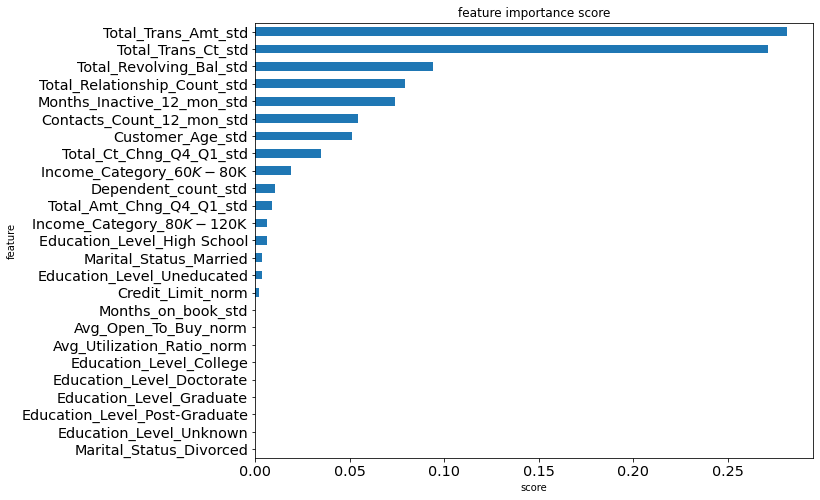

In [102]:
show_feature_importance(ab_tuned.best_estimator_)

---
# Boosting : XGBoost

In [103]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_oversample, y_oversample)

print(classification_report(y_test, xg.predict(X_test)))

[11:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1952
           1       0.90      0.91      0.91       392

    accuracy                           0.97      2344
   macro avg       0.94      0.95      0.94      2344
weighted avg       0.97      0.97      0.97      2344



In [104]:
y_pred_train = xg.predict(X_oversample)
y_pred_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [105]:
print("Recall (Train Set): %.2f" % recall_score(y_oversample, y_pred_train))

Recall (Train Set): 1.00


In [106]:
eval_classification(xg, y_pred, X_oversample, y_oversample, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.84
Recall (Test Set): 0.88
F1-Score (Test Set): 0.86
AUC: 0.92


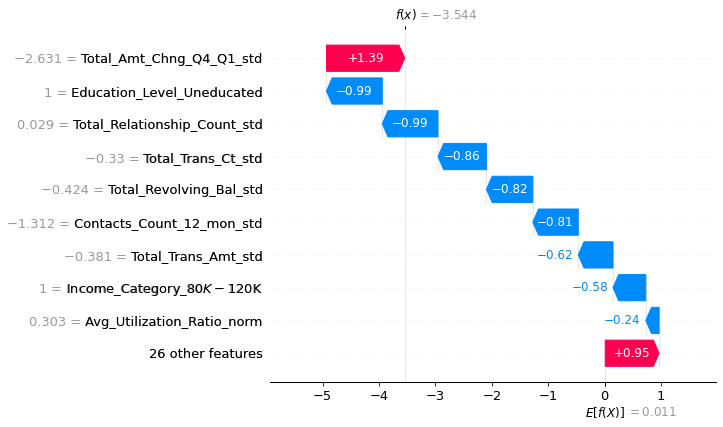

<Figure size 864x288 with 0 Axes>

In [107]:
import shap

explainer = shap.Explainer(xg)
shap_values = explainer(X_oversample)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])
plt.savefig('shap-waterfall.png')

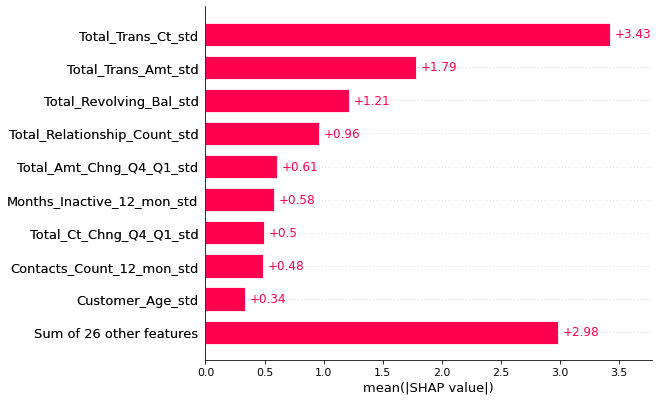

In [108]:
shap.plots.bar(shap_values)

## Hyperparameter Tuning XGBoost

In [109]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_oversample, y_oversample)

# Predict & Evaluation
print(classification_report(y_test, xg_tuned.predict(X_test)))

[11:42:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:42:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:42:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:42:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [110]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 70
Best min_child_weight: 10
Best gamma: 0.8
Best tree_method: auto
Best colsample_bytree: 0.5
Best eta: 0.020202020202020204
Best lambda: 0.8
Best alpha: 0.6000000000000001


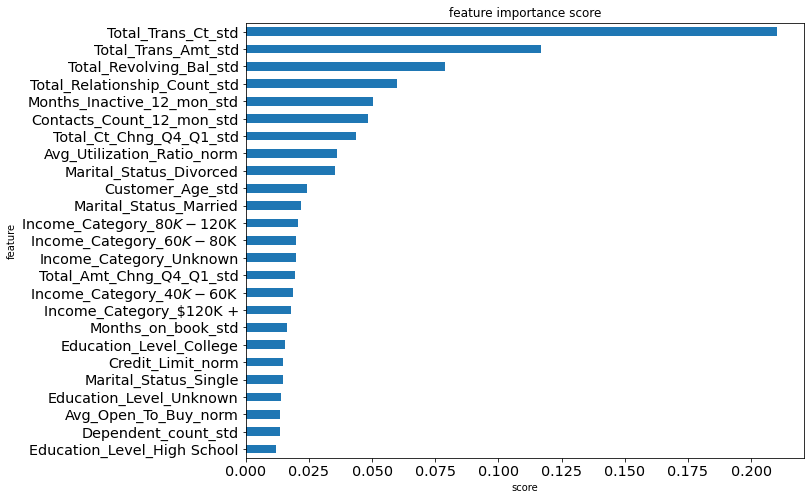

In [111]:
show_feature_importance(xg_tuned.best_estimator_)